In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

1. https://www.kaggle.com/code/adityaghuse/book-recommendation-popularity-and-collaborative

2. https://www.kaggle.com/code/budhadityadutta/book-recommendation-system

3. https://www.kaggle.com/code/edatasasiz/book-recommendation-system

4. https://www.kaggle.com/code/vishorita/best-recommendation-collabarative-filtering

5. https://www.kaggle.com/code/hilalmleykeyuksel/book-recommender

In [ ]:
books = pd.read_csv('/content/Books.csv')
users = pd.read_csv('/content/Users.csv')
ratings = pd.read_csv('/content/Ratings.csv')

In [ ]:
print('shape of books ',books.shape)
print()
books.info()

shape of books  (271360, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
# user
print('shape of users',users.shape)
print()
users.info()

shape of users (278858, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
# ratings
print('shape of rating',ratings.shape)
print()
ratings.info()

shape of rating (1149780, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


<Axes: >

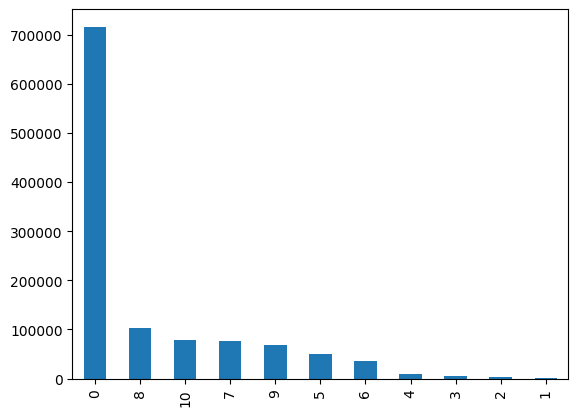

In [ ]:
ratings['Book-Rating'].value_counts().plot(kind='bar')

In [ ]:
# find the null value in books dataset
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
# drop the rows containing missing values within the DataFrame
books.dropna(inplace=True)

In [ ]:
# dupilcated value
books.duplicated().sum()

0

In [ ]:
books['Year-Of-Publication'].value_counts().index.values

array([2002, 2001, 1999, 2000, 1998, 2003, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 2004, 1986, '1999', 1985,
       '2000', '2002', '1998', '2001', 1984, 0, '1997', '1996', 1983,
       '1995', 1982, '1994', '2003', '1993', '1992', '1991', 1981, '1990',
       '1989', '1988', 1980, '1987', '1986', 1979, 1978, '1985', 1977,
       '1984', '2004', '1983', 1976, '1982', '0', '1981', 1975, '1980',
       1974, '1979', 1973, '1978', 1972, '1977', '1976', '1975', 1971,
       '1974', 1970, '1973', 1969, '1972', '1971', 1968, '1970', 1966,
       1967, 1965, 1964, '1969', 1963, 1960, 1961, 1962, 1959, '1968',
       1958, 1957, '1965', 1953, 1955, '1960', 1956, '1961', 1954, '1966',
       '1962', '1967', '1963', '1964', 1951, 2005, 1940, '1959', '1956',
       1920, '1957', '1955', 1952, 1950, '1958', '2005', '1953', 1942,
       1930, 1946, '1952', 1947, 1911, '1911', '1951', '1950', 1949, 1941,
       '1940', '1954', 1923, 1939, 1901, 1929, 1938, 1948, 1943

In [ ]:
# Step 1: Filter out invalid or non-year values
valid_years = books['Year-Of-Publication'].astype(str).str.isnumeric()
books = books[valid_years]

# Step 2: Convert the column data to integers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

# Step 3: Create a new datetime column from the integers representing years
books['Publication_Date'] = pd.to_datetime(books['Year-Of-Publication'], format='%Y', errors='coerce')

# Drop the old 'Year-Of-Publication' column if you don't need it anymore
books.drop(columns=['Year-Of-Publication'], inplace=True)

# Display the DataFrame to check the new datetime column
books = pd.DataFrame(books)

In [ ]:
books

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2002-01-01
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2001-01-01
2,0060973129,Decision in Normandy,Carlo D'Este,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1991-01-01
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1999-01-01
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1999-01-01
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1988-01-01
271356,0525447644,From One to One Hundred,Teri Sloat,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1991-01-01
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,2004-01-01
271358,0192126040,Republic (World's Classics),Plato,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1996-01-01


In [ ]:
# Step 4: Create a new column with only the year part as integers
books['Year-Of-Publication'] = books['Publication_Date'].dt.year

In [ ]:
books['Year-Of-Publication'].value_counts().index.values

array([2002., 1999., 2001., 2000., 1998., 1997., 2003., 1996., 1995.,
       1994., 1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986.,
       2004., 1985., 1984., 1983., 1982., 1981., 1980., 1979., 1978.,
       1977., 1976., 1975., 1974., 1973., 1972., 1971., 1970., 1969.,
       1968., 1966., 1967., 1965., 1964., 1960., 1961., 1963., 1962.,
       1959., 1958., 1957., 1956., 1955., 1953., 1954., 2005., 1951.,
       1940., 1952., 1920., 1950., 1911., 1942., 1947., 1946., 1930.,
       1949., 1923., 1941., 1939., 1948., 1945., 1943., 1901., 1938.,
       2030., 1936., 1929., 1937., 1932., 1944., 1933., 1935., 2006.,
       1900., 1931., 2020., 1927., 1921., 1922., 1909., 2011., 1925.,
       1926., 2010., 1924., 1902., 2050., 1928., 1904., 2012., 2024.,
       1897., 1919., 2008., 1934., 1910., 1806., 2021., 2038., 1906.,
       1908., 1914., 1917., 2026., 2037.])

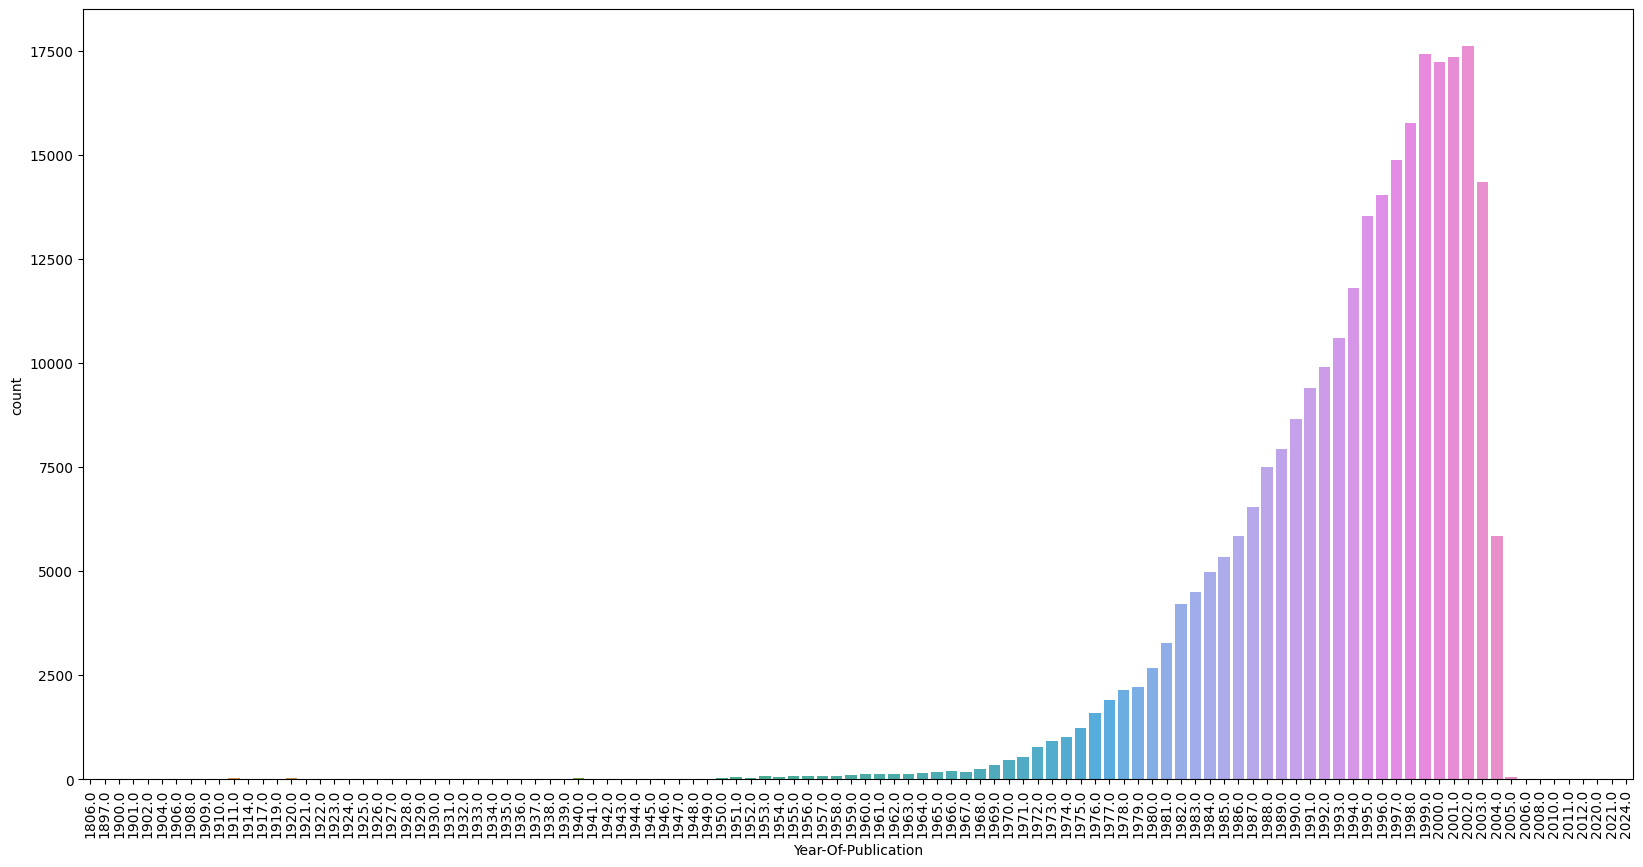

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=books['Year-Of-Publication']);
plt.xticks(rotation=90)
plt.show()

In [ ]:
# this all the invalid data at this time

books = books[~(books['Year-Of-Publication'] == 2037)]
books = books[~(books['Year-Of-Publication'] == 2026)]
books = books[~(books['Year-Of-Publication'] == 2030)]
books = books[~(books['Year-Of-Publication'] == 2050)]
books = books[~(books['Year-Of-Publication'] == 2038)]

In [ ]:
books['Publisher'].value_counts()

Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: Publisher, Length: 16803, dtype: int64

<Axes: >

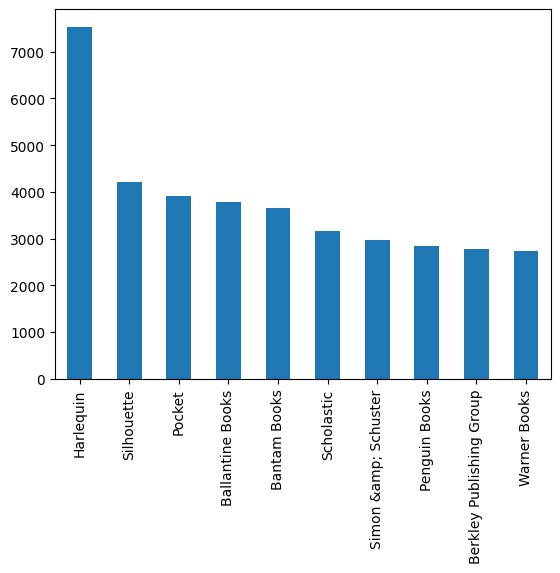

In [ ]:
# top 10 Publisher
books['Publisher'].value_counts().head(10).plot(kind='bar')

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271342 entries, 0 to 271359
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ISBN                 271342 non-null  object        
 1   Book-Title           271342 non-null  object        
 2   Book-Author          271342 non-null  object        
 3   Publisher            271342 non-null  object        
 4   Image-URL-S          271342 non-null  object        
 5   Image-URL-M          271342 non-null  object        
 6   Image-URL-L          271342 non-null  object        
 7   Publication_Date     266722 non-null  datetime64[ns]
 8   Year-Of-Publication  266722 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 20.7+ MB


In [ ]:
books.to_csv('Revised_books.csv', index = False)

In [ ]:
# find the null values
round(100*(users.isnull().sum()/len(users.index)),2)

User-ID      0.00
Location     0.00
Age         39.72
dtype: float64

In [ ]:
# remove the age column
users.drop('Age',axis=1,inplace=True)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.3+ MB


In [ ]:
users['Location'].value_counts().index.values

array(['london, england, united kingdom', 'toronto, ontario, canada',
       'sydney, new south wales, australia', ...,
       'bouchegouf, guelma, algeria',
       'indiana and philadelphia, pennsylvania, usa',
       'tacoma, washington, united kingdom'], dtype=object)

In [ ]:
users['Location'] = users['Location'].apply(lambda x:x.split(',')[-1])

<Axes: >

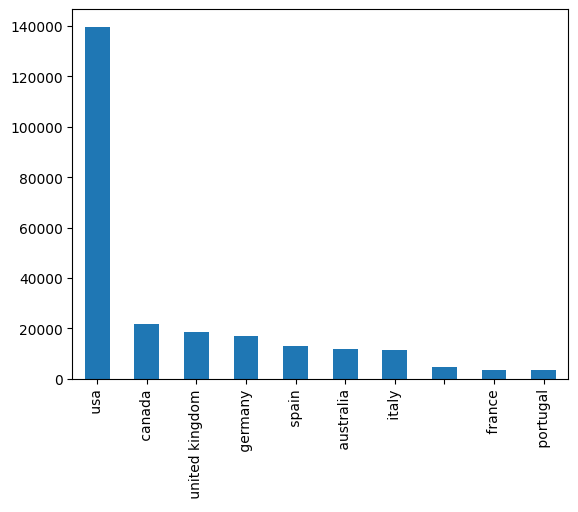

In [ ]:
# top 10 user location
users['Location'].value_counts().head(10).plot(kind='bar')

In [ ]:
users.to_csv('Revised_Users.csv', index = False)

In [ ]:
# null values
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
# duplicate values
ratings.duplicated().sum()

0

In [ ]:
ratings_revised = ratings[~(ratings['Book-Rating'] == 0)]

In [ ]:
ratings_revised['Book-Rating'].value_counts()

8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [ ]:
def preprocess_ratings(rating):
  if rating <= 5:
    # negative reviews
    rating = 0
  elif rating == 6 or rating == 7:
    # neutral review
    rating = 1
  else:
    # positive review
    rating = 2
  return rating

In [ ]:
ratings_revised['Book-Rating'] = ratings_revised['Book-Rating'].apply(preprocess_ratings)

In [ ]:
ratings_revised['Book-Rating'].value_counts()

2    249887
1    113381
0     70403
Name: Book-Rating, dtype: int64

In [ ]:
ratings_revised.to_csv('Revised_Ratings.csv', index = False)

In [11]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=baa9d0c5c061f071bbf2a7dc92ef6485714c47bb884bced500f4eafed31222ad
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [12]:
from sentence_transformers import SentenceTransformer
model_st = SentenceTransformer('distilroberta-base')
embeddings = model_st.encode('I am a sentence')
print(embeddings)

.gitattributes:   0%|          | 0.00/445 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

dict.txt:   0%|          | 0.00/603k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/331M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

[ 7.57866502e-02  3.81220058e-02 -3.62515934e-02 -1.86980069e-01
  3.90629381e-01 -1.16188796e-02 -2.59760562e-02  1.02643810e-01
 -7.26098791e-02 -7.35845091e-03  5.03530204e-02  2.48646155e-01
  8.26099217e-02  1.26226002e-03  2.90096570e-02 -4.86334302e-02
  4.09876965e-02  6.54978976e-02  9.71588492e-03  2.36529429e-02
 -7.85205290e-02  4.95353527e-02 -3.65299694e-02  7.21685290e-02
 -3.36442925e-02  7.86368698e-02  8.87088254e-02 -5.17101446e-03
 -2.64419690e-02  5.97074144e-02 -2.81791147e-02 -6.53504441e-03
  7.79853985e-02  2.73469612e-02 -1.15294643e-01 -3.15385796e-02
  3.20428275e-02  1.00710310e-01 -8.82796478e-03  3.19221579e-02
 -1.46098986e-01 -1.77711606e-01 -2.09688488e-02  5.62191568e-02
  2.94273696e-03  1.01067591e-02 -9.72871408e-02  1.61081254e-02
  1.88949518e-02 -8.79677851e-03 -1.60643812e-02 -8.95258486e-02
 -6.11388423e-02  9.98080242e-03  5.68003692e-02  4.29434590e-02
  5.99990301e-02  1.77009031e-01 -2.11902019e-02  2.59078238e-02
 -3.99260558e-02  1.87408

In [13]:
books_revised = pd.read_csv('/content/Revised_books.csv')
books_revised

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date,Year-Of-Publication
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2002-01-01,2002.0
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2001-01-01,2001.0
2,0060973129,Decision in Normandy,Carlo D'Este,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1991-01-01,1991.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1999-01-01,1999.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1999-01-01,1999.0
...,...,...,...,...,...,...,...,...,...
271337,0440400988,There's a Bat in Bunk Five,Paula Danziger,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1988-01-01,1988.0
271338,0525447644,From One to One Hundred,Teri Sloat,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1991-01-01,1991.0
271339,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,2004-01-01,2004.0
271340,0192126040,Republic (World's Classics),Plato,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1996-01-01,1996.0


In [14]:
def get_embeddings(text):
  embeddings = model_st.encode(text)
  return embeddings

In [15]:
books_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271342 entries, 0 to 271341
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271342 non-null  object 
 1   Book-Title           271342 non-null  object 
 2   Book-Author          271342 non-null  object 
 3   Publisher            271342 non-null  object 
 4   Image-URL-S          271342 non-null  object 
 5   Image-URL-M          271342 non-null  object 
 6   Image-URL-L          271342 non-null  object 
 7   Publication_Date     266722 non-null  object 
 8   Year-Of-Publication  266722 non-null  float64
dtypes: float64(1), object(8)
memory usage: 18.6+ MB


In [ ]:
books_revised['Book-Title-Embeddings'] = books_revised['Book-Title'].apply(get_embeddings)

In [20]:
books_revised['Book-Title-Embeddings']

0         [0.024877159, 0.10173398, 0.008982423, -0.0422...
1         [0.021850197, 0.09996452, -0.008913775, 0.0086...
2         [0.108884476, 0.12413964, 0.070907414, -0.0191...
3         [-0.0006484435, 0.056569833, 0.0588726, -0.079...
4         [-0.022863291, 0.09121057, 0.042459827, -0.068...
                                ...                        
271337    [0.014550564, 0.05563256, -0.0022879778, -0.08...
271338    [-0.04429957, 0.10017214, -0.053145237, -0.180...
271339    [0.03352823, 0.08718317, 0.059976913, -0.10621...
271340    [0.05257736, 0.10256034, 0.096724406, -0.03745...
271341    [0.04032328, 0.15374969, 0.01136032, -0.021971...
Name: Book-Title-Embeddings, Length: 271342, dtype: object

In [18]:
books_revised['Book-Author-Embeddings'] = books_revised['Book-Author'].apply(get_embeddings)

In [19]:
books_revised['Book-Author-Embeddings']

0         [0.050113805, 0.19039379, -0.042156167, -0.030...
1         [0.042836897, 0.09478746, -0.04669345, -0.1320...
2         [-0.0012366134, 0.1665831, -0.014821738, -0.03...
3         [0.046596624, 0.09517868, -0.021209955, 0.0720...
4         [0.018520854, 0.2401449, -0.09477173, -4.13101...
                                ...                        
271337    [0.022844909, 0.1401193, 0.027632263, -0.02954...
271338    [0.037068896, 0.0666942, -0.0120653035, -0.078...
271339    [0.044990674, 0.15579882, -0.041020915, 0.0131...
271340    [-0.0044443663, 0.06211237, -0.027349705, 0.00...
271341    [0.051602274, 0.11705717, 0.051672224, -0.0433...
Name: Book-Author-Embeddings, Length: 271342, dtype: object

In [21]:
books_revised['Publisher-Embeddings'] = books_revised['Publisher'].apply(get_embeddings)

In [22]:
books_revised['Publisher-Embeddings']

0         [0.036945414, 0.022760093, -0.0014404207, -0.0...
1         [-0.03696592, 0.11428997, 0.043399733, -0.0993...
2         [-0.057317413, 0.13131586, 0.06444357, 0.02104...
3         [0.053627994, 0.02968765, 0.040409278, -0.1821...
4         [0.10890775, 0.2161602, 0.02052968, -0.0266793...
                                ...                        
271337    [0.030959016, 0.06137376, 0.08857596, -0.13916...
271338    [0.015267253, 0.05891762, 0.016585294, -0.0169...
271339    [-0.04056022, 0.22040097, 0.005055469, -0.0176...
271340    [0.036945414, 0.022760093, -0.0014404207, -0.0...
271341    [0.019598154, 0.1521295, -0.039923914, 0.07961...
Name: Publisher-Embeddings, Length: 271342, dtype: object

In [ ]:
books_revised.to_csv('Revised_books_embeddings.csv', index = False)

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
books_revised.to_csv('/content/Revised_books_embeddings.csv', index=False)